# Tutorial for scMusketeers

We will see in this tutorial two use-cases:
- Transfer cell annotation to unlabeled cells
- Transfer cell annotation and reduce batch from a query atlas to a reference atlas 

In [1]:
# Install scMusketeers if needed
#pip install scmusketeers

In [1]:
%%bash
sc-musketeers --help

2024-10-21 14:58:27.614202: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-21 14:58:27.626523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 14:58:27.641625: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-21 14:58:27.646364: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-21 14:58:27.657521: I tensorflow/core/platform/cpu_feature_guar

/data/analysis/ML_models/conda_env/cb_scmusketeers/bin
tf [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
usage: sc-musketeers [OPTIONS] process atlas_name your_search_folder/

musketeers....

positional arguments:
  process               Type of process to run : Training, Hyperparameter
                        optimization among ['transfer', 'optim']
  ref_path              Path of the referent adata file (example :
                        data/ajrccm.h5ad

options:
  -h, --help            show this help message and exit
  --class_key CLASS_KEY
                        Key of the celltype to classify
  --batch_key BATCH_KEY
                        Key of the batches

Worklow parameters:
  --query_path [QUERY_PATH]
                        Optional query dataset
  --out_dir [OUT_DIR]   The output directory
  --out_name [OUT_NAME]
                        The output naming
  --training_scheme [TRAINING_SCHEME]
  --log_neptune [LOG_NEPTUNE]
  --hparam_path [HPARAM_PATH]
 

## Download CellTypist Lung data

Download Lung cell atlas from CellTypist website (https://www.celltypist.org/organs)

In [3]:
%%bash
## cd /data/analysis/data_becavin/scmusketeers/
mkdir data
curl -o data/lung_celltypist.h5ad "https://celltypist.cog.sanger.ac.uk/Resources/Organ_atlas/Lung/Lung.h5ad"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3377M  100 3377M    0     0  98.1M      0  0:00:34  0:00:34 --:--:-- 97.7M


In [1]:
import os
import scanpy as sc
working_dir = "/data/analysis/data_becavin/scmusketeers/"
# working_dir = ""
path_lung_celltypist = "data/lung_celltypist.h5ad"

In [2]:
adata = sc.read_h5ad(os.path.join(working_dir,path_lung_celltypist))
adata.obs

,Dataset,donor_id,development_stage,sex,suspension_type,assay,Original_annotation,CellHint_harmonised_group,cell_type,Curated_annotation,organism,disease,tissue
P2_1_AAACCTGAGAAACCAT,Travaglini et al. 2020,2,46-year-old human stage,male,cell,10x 3' v2,Capillary Aerocyte,Group57,alveolar capillary type 2 endothelial cell,Capillary aerocytes,Homo sapiens,normal,lung
P2_1_AAATGCCAGATGAGAG,Travaglini et al. 2020,2,46-year-old human stage,male,cell,10x 3' v2,Capillary Aerocyte,Group57,alveolar capillary type 2 endothelial cell,Capillary aerocytes,Homo sapiens,normal,lung
P2_1_AACACGTTCGATCCCT,Travaglini et al. 2020,2,46-year-old human stage,male,cell,10x 3' v2,Capillary Aerocyte,Group57,alveolar capillary type 2 endothelial cell,Capillary aerocytes,Homo sapiens,normal,lung
P2_1_AACACGTTCGCACTCT,Travaglini et al. 2020,2,46-year-old human stage,male,cell,10x 3' v2,Capillary Aerocyte,Group57,alveolar capillary type 2 endothelial cell,Capillary aerocytes,Homo sapiens,normal,lung
P2_1_AACCATGCAGCTCGCA,Travaglini et al. 2020,2,46-year-old human stage,male,cell,10x 3' v2,Capillary Aerocyte,Group57,alveolar capillary type 2 endothelial cell,Capillary aerocytes,Homo sapiens,normal,lung
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATAGAAAC-1-HCATisStab7747200,Madissoon et al. 2020,390C,seventh decade human stage,female,cell,10x 3' v2,NK,Group49,"effector memory CD8-positive, alpha-beta T cel...",Tem/Temra cytotoxic T cells,Homo sapiens,normal,lung
TTTGTCAGTCGGATCC-1-HCATisStab7747200,Madissoon et al. 2020,390C,seventh decade human stage,female,cell,10x 3' v2,NK,Group49,"effector memory CD8-positive, alpha-beta T cel...",Tem/Temra cytotoxic T cells,Homo sapiens,normal,lung
TTTGTCATCAAACAAG-1-HCATisStab7747200,Madissoon et al. 2020,390C,seventh decade human stage,female,cell,10x 3' v2,Monocyte,Group45,classical monocyte,Classical monocytes,Homo sapiens,normal,lung
TTTGTCATCATGGTCA-1-HCATisStab7747200,Madissoon et al. 2020,390C,seventh decade human stage,female,cell,10x 3' v2,Monocyte,Group45,classical monocyte,Classical monocytes,Homo sapiens,normal,lung


## Prepare data

In [1]:
import os
import scanpy as sc
working_dir = "/data/analysis/data_becavin/scmusketeers/"
# working_dir = ""
path_lung_celltypist = "data/lung_celltypist.h5ad"

2024-10-21 20:45:00.320816: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-21 20:45:00.334104: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 20:45:00.349291: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-21 20:45:00.353748: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-21 20:45:00.365531: I tensorflow/core/platform/cpu_feature_guar

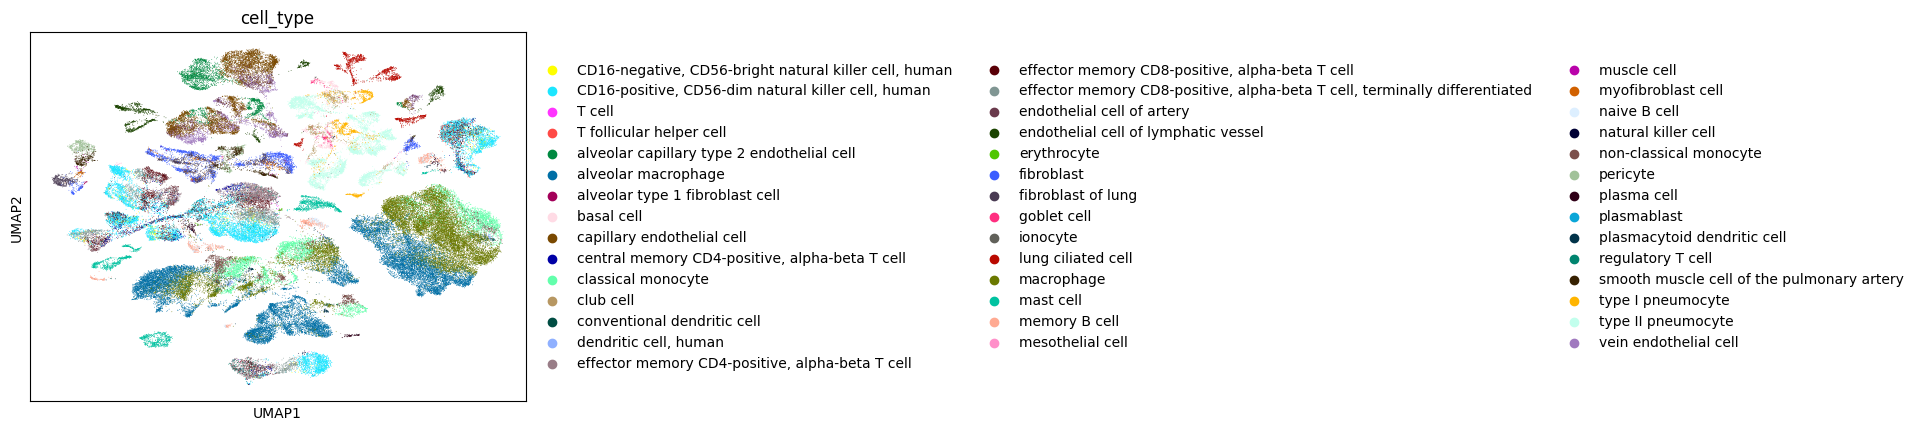

P2_1_AAACCTGAGAAACCAT                          alveolar capillary type 2 endothelial cell
P2_1_AAATGCCAGATGAGAG                          alveolar capillary type 2 endothelial cell
P2_1_AACCGCGAGTCATCCA                          alveolar capillary type 2 endothelial cell
P2_1_AACGTTGCATTTCACT                          alveolar capillary type 2 endothelial cell
P2_1_AACTCAGTCCGTACAA                          alveolar capillary type 2 endothelial cell
                                                              ...                        
TTTGGTTGTGTGCGTC-1-HCATisStab7747200    effector memory CD8-positive, alpha-beta T cel...
TTTGTCAAGAGGACGG-1-HCATisStab7747200    effector memory CD8-positive, alpha-beta T cel...
TTTGTCAAGATAGTCA-1-HCATisStab7747200    CD16-positive, CD56-dim natural killer cell, h...
TTTGTCAAGGTACTCT-1-HCATisStab7747200                                              Unknown
TTTGTCACAGACTCGC-1-HCATisStab7747200    effector memory CD8-positive, alpha-beta T cel...
Name: cell

/data/analysis/ML_models/conda_env/cb_scmusketeers/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


In [ ]:
import tutorial
name = "CellTypist-Lung"

class_key = "cell_type"
unlabeled_category = "Unknown"
batch_key = "donor_id"
subsample = 0.3 # keep only this percentage of the atlas 

# Create dataset with 20% unknown cells
sampling_percentage = 0.2
tutorial.create_tuto_data(
    subsample,
    sampling_percentage,
    path_lung_celltypist,
    working_dir,
    name,
    class_key,
    batch_key,
    unlabeled_category
)

# Create dataset with 40% unknown cells
sampling_percentage = 0.4
tutorial.create_tuto_data(
    subsample,
    sampling_percentage,
    path_lung_celltypist,
    working_dir,
    name,
    class_key,
    batch_key,
    unlabeled_category
)

## Transfer cell annotation to unlabeled cells (20% unknown)

In [ ]:
# read ref adata
path_adata="data/CellTypist-Lung-unknown-0.2.h5ad"
adata = sc.read_h5ad(path_adata)
print(adata)

In [ ]:
sc.pl.umap(adata, color = "cell_type")

In [ ]:
adata.obs["Known"] = adata.obs["cell_type"] != "Unknown"
sc.pl.umap(adata, color = "Known")

Run scMusketeers in command line

In [7]:
%%bash
outdir="/data/analysis/data_becavin/scmusketeers"
dataset=${workingdir}"/data/CellTypist-Lung-unknown-0.2.h5ad"
outname="CellTypist-Lung-unknown-0.2-pred"

sc-cerbero transfer ${dataset} --class_key=cell_type --unlabeled_category="Unknown" --batch_key=manip --out_dir=${outdir} --out_name=${outname}

2024-07-10 16:38:58.877899: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-10 16:38:58.922878: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-10 16:39:05.850461: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 34955 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:37:00.0, compute capability: 8.0


/data/analysis/ML_models/conda_env/cb_scpermut/bin
tf [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
../data/Deprez-2020-unknown-0.2.h5ad celltype manip
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/becavin-lab/sc-permut-packaging/e/SCPERP1-448


/home/becavin/scCerberus/scpermut/transfer/dataset_tf.py:182: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.adata_train_extended.obs['train_split'] = spl.values
/data/analysis/ML_models/conda_env/cb_scpermut/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Unknown
['Unknown', 'Secretory N', 'Multiciliated', 'Monocyte', 'Basal', ..., 'Smooth muscle', 'B cells', 'AT1', 'Precursor', 'AT2']
Length: 29
Categories (29, object): ['AT1', 'AT2', 'B cells', 'Basal', ..., 'Smooth muscle', 'Suprabasal',
                          'Suprabasal N', 'Unknown']
3118
adam
Training scheme : training_scheme_13, warmup 100
adam
Epoch 1/50, Current strat Epoch 1/25
use_perm = True
switching perm
2494/2495 - total loss: 0.6632 - classification loss: 1.6923 - dann loss: 4.3713 - reconstruction loss: 0.0711Epoch 2/50, Current strat Epoch 2/25
use_perm = True
switching perm
2494/2495 - total loss: 0.5668 - classification loss: 0.7774 - dann loss: 4.5129 - reconstruction loss: 0.0472Epoch 3/50, Current strat Epoch 3/25
use_perm = True
switching perm
2494/2495 - total loss: 0.5233 - classification loss: 0.5019 - dann loss: 4.4137 - reconstruction loss: 0.0397Epoch 4/50, Current strat Epoch 4/25
use_perm = True
switching perm
2494/2495 - total loss: 0.5010 - classifi

AnnData object with n_obs × n_vars = 15594 × 25863
    obs: 'donor', 'manip', 'method', 'position', 'Sex', 'Age', 'celltype', 'phenotype', 'celltype_phenotype', 'celltype_position', 'TRAIN_TEST_split', 'true_celltype', 'n_counts', 'size_factors', 'train_split', 'celltype_pred'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts'
    uns: 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'celltype_pred_proba', 'tsne_hg19', 'umap_hg19', 'umap_uncorrected_hg19'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


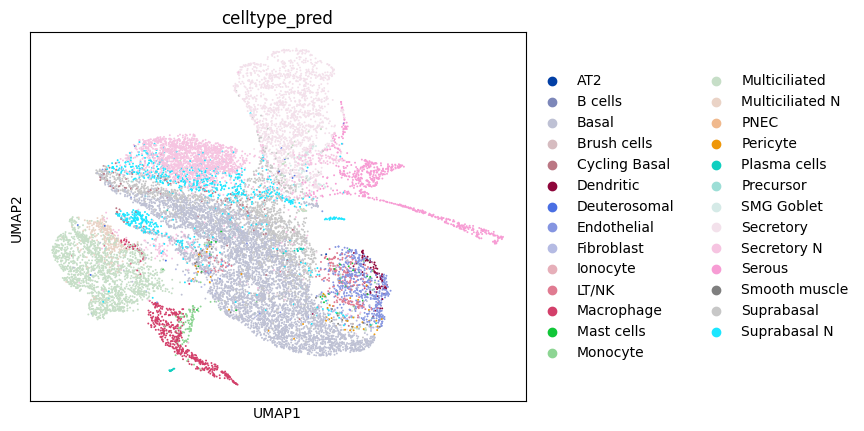

In [8]:
# read predicted adata
path_adata="/data/analysis/data_becavin/scpermut_test/tutorial/Deprez-2020-unknown-0.2-pred.h5ad"
adata_pred = sc.read_h5ad(path_adata)
print(adata_pred)
sc.pl.umap(adata_pred, color = "celltype_pred")

## Transfer cell annotation and reduce batch from a query atlas to a reference atlas (20% unknown)

In [9]:
# read ref adata
path_adata="../data/Deprez-2020-ref-batch-0.2.h5ad"
ref_adata = sc.read_h5ad(path_adata)
print(adata)

AnnData object with n_obs × n_vars = 15594 × 33540
    obs: 'donor', 'manip', 'method', 'position', 'Sex', 'Age', 'celltype', 'phenotype', 'celltype_phenotype', 'celltype_position', 'TRAIN_TEST_split', 'Known'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'celltype_colors', 'neighbors', 'pca', 'umap', 'Known_colors'
    obsm: 'X_pca', 'X_umap', 'tsne_hg19', 'umap_hg19', 'umap_uncorrected_hg19'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


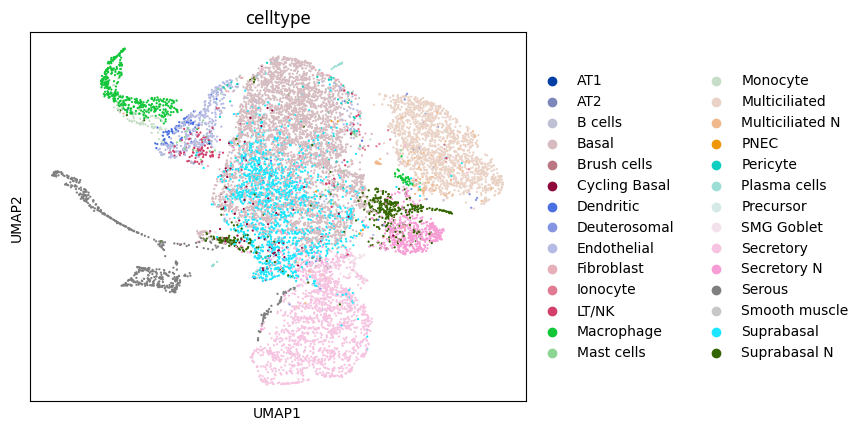

In [10]:
sc.pl.umap(ref_adata, color = "celltype")

In [11]:
# read query adata
path_adata="../data/Deprez-2020-query-batch-0.2.h5ad"
query_adata = sc.read_h5ad(path_adata)
print(adata)

AnnData object with n_obs × n_vars = 15594 × 33540
    obs: 'donor', 'manip', 'method', 'position', 'Sex', 'Age', 'celltype', 'phenotype', 'celltype_phenotype', 'celltype_position', 'TRAIN_TEST_split', 'Known'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'celltype_colors', 'neighbors', 'pca', 'umap', 'Known_colors'
    obsm: 'X_pca', 'X_umap', 'tsne_hg19', 'umap_hg19', 'umap_uncorrected_hg19'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


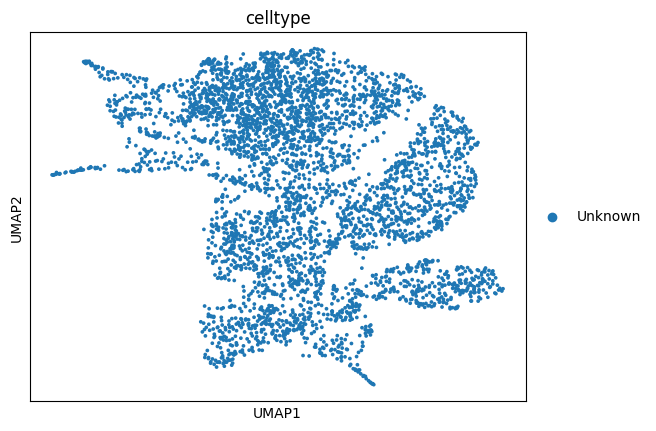

In [12]:
sc.pl.umap(query_adata, color = "celltype")

Run scCerbero in command line

In [18]:
%%bash
ref_dataset=../data/Deprez-2020-ref-batch-0.2.h5ad
query_dataset=../data/Deprez-2020-query-batch-0.2.h5ad
outdir=/data/analysis/data_becavin/scpermut_test/tutorial
outname_query="Deprez-2020-query-0.2-pred"

sc-cerbero transfer ${ref_dataset} --query_path ${query_dataset} --class_key=celltype --unlabeled_category="Unknown" --batch_key=manip --out_dir=${outdir} --out_name=${outname_query}

2024-07-10 17:04:54.385186: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-10 17:04:54.428865: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-10 17:05:01.212671: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 26074 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:37:00.0, compute capability: 8.0


/data/analysis/ML_models/conda_env/cb_scpermut/bin
tf [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
../data/Deprez-2020-ref-batch-0.2.h5ad celltype manip
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/becavin-lab/sc-permut-packaging/e/SCPERP1-451


/home/becavin/scCerberus/scpermut/transfer/dataset_tf.py:78: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = ref.concatenate(query, join = "inner")
/home/becavin/scCerberus/scpermut/transfer/dataset_tf.py:182: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.adata_train_extended.obs['train_split'] = spl.values


Unknown
['Basal' 'Multiciliated' 'Monocyte' 'Suprabasal' 'Secretory' 'Endothelial'
 'Fibroblast' 'Secretory N' 'LT/NK' 'Plasma cells' 'Macrophage'
 'Suprabasal N' 'Serous' 'Dendritic' 'Pericyte' 'PNEC' 'Cycling Basal'
 'Mast cells' 'B cells' 'SMG Goblet' 'Deuterosomal' 'Multiciliated N'
 'Ionocyte' 'Precursor' 'Smooth muscle' 'Brush cells' 'AT1' 'AT2'
 'Unknown']
4134
adam
Training scheme : training_scheme_13, warmup 100
adam
Epoch 1/50, Current strat Epoch 1/25
use_perm = True
switching perm
2290/2292 - total loss: 0.6756 - classification loss: 1.7002 - dann loss: 4.4673 - reconstruction loss: 0.0736Epoch 2/50, Current strat Epoch 2/25
use_perm = True
switching perm
2290/2292 - total loss: 0.5680 - classification loss: 0.7441 - dann loss: 4.5305 - reconstruction loss: 0.0507Epoch 3/50, Current strat Epoch 3/25
use_perm = True
switching perm
2290/2292 - total loss: 0.5119 - classification loss: 0.4651 - dann loss: 4.3151 - reconstruction loss: 0.0423Epoch 4/50, Current strat Epoch 4/25

AnnData object with n_obs × n_vars = 15594 × 25863
    obs: 'donor', 'manip', 'method', 'position', 'Sex', 'Age', 'celltype', 'phenotype', 'celltype_phenotype', 'celltype_position', 'TRAIN_TEST_split', 'batch', 'true_celltype', 'n_counts', 'size_factors', 'train_split', 'celltype_pred'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts'
    uns: 'log1p'
    obsm: 'X_pca', 'X_umap', 'celltype_pred_proba', 'tsne_hg19', 'umap_hg19', 'umap_uncorrected_hg19'


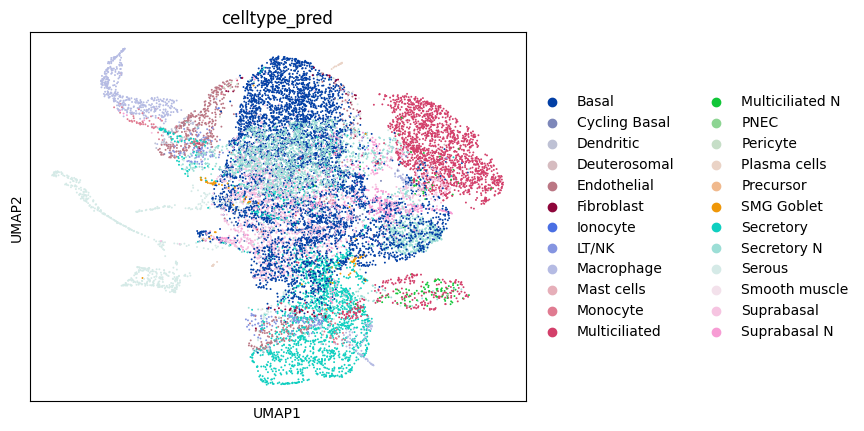

In [19]:
# read predicted adata
path_adata="/data/analysis/data_becavin/scpermut_test/tutorial/Deprez-2020-query-0.2-pred.h5ad"
adata_pred = sc.read_h5ad(path_adata)
print(adata_pred)
sc.pl.umap(adata_pred, color = "celltype_pred")

In [20]:
print("ref adata :",ref_adata)
print("query adata :",query_adata)
print("Adata prediction :",adata_pred)


ref adata : AnnData object with n_obs × n_vars = 11460 × 33540
    obs: 'donor', 'manip', 'method', 'position', 'Sex', 'Age', 'celltype', 'phenotype', 'celltype_phenotype', 'celltype_position', 'TRAIN_TEST_split'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'neighbors', 'pca', 'umap', 'celltype_colors'
    obsm: 'X_pca', 'X_umap', 'tsne_hg19', 'umap_hg19', 'umap_uncorrected_hg19'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
query adata : AnnData object with n_obs × n_vars = 4134 × 33540
    obs: 'donor', 'manip', 'method', 'position', 'Sex', 'Age', 'celltype', 'phenotype', 'celltype_phenotype', 'celltype_position', 'TRAIN_TEST_split'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'neighbors', 'pca', 'umap', 'celltype_colors'
    obsm: 'X_pca', 'X_umap', 'tsne_hg19', 'umap_hg19', 'umap_uncorrected_hg19'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
Adata prediction : AnnData object with n_obs × n_vars = 15594 × 25863
    obs: 'donor', 'manip', 'm

## Run scCerbero in python

In [21]:
import json
from scpermut.arguments.runfile import get_runfile, create_argparser
from scpermut.arguments.runfile import PROCESS_TYPE
from scpermut.transfer.optimize_model import Workflow
from scpermut.transfer.experiment import MakeExperiment
from scpermut.arguments.neptune_log import start_neptune_log, stop_neptune_log
import pickle

In [22]:
# Prepare scCerberus
import os
print(os.getcwd())
with open('runfile_tuto_2.pkl', 'rb') as inp:
    run_file = pickle.load(inp)
run_file.train_scheme = "training_scheme_13"
run_file.ref_path = '../data/Deprez-2020-ref-batch-0.2.h5ad'
run_file.query_path = '../data/Deprez-2020-query-batch-0.2.h5ad'

print(run_file.ref_path, run_file.class_key, run_file.batch_key)
workflow = Workflow(run_file=run_file)
start_neptune_log(workflow)
workflow.process_dataset()
workflow.train_val_split()
adata_pred, model, history, X_scCER, query_pred  = workflow.make_experiment()
stop_neptune_log(workflow)
print(query_pred)
        

/home/becavin/scCerberus/tutorial
../data/Deprez-2020-ref-batch-0.2.h5ad celltype manip
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/becavin-lab/sc-permut-packaging/e/SCPERP1-452


/home/becavin/scCerberus/scpermut/transfer/dataset_tf.py:78: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = ref.concatenate(query, join = "inner")
/home/becavin/scCerberus/scpermut/transfer/dataset_tf.py:182: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.adata_train_extended.obs['train_split'] = spl.values


Unknown
['Basal' 'Multiciliated' 'Monocyte' 'Suprabasal' 'Secretory' 'Endothelial'
 'Fibroblast' 'Secretory N' 'LT/NK' 'Plasma cells' 'Macrophage'
 'Suprabasal N' 'Serous' 'Dendritic' 'Pericyte' 'PNEC' 'Cycling Basal'
 'Mast cells' 'B cells' 'SMG Goblet' 'Deuterosomal' 'Multiciliated N'
 'Ionocyte' 'Precursor' 'Smooth muscle' 'Brush cells' 'AT1' 'AT2'
 'Unknown']
4134
adam
Training scheme : training_scheme_13, warmup 100
adam
Epoch 1/50, Current strat Epoch 1/25
use_perm = True
switching perm
2290/2292 - total loss: 0.6446 - classification loss: 1.5787 - dann loss: 4.2744 - reconstruction loss: 0.0741Epoch 2/50, Current strat Epoch 2/25
use_perm = True
switching perm
2290/2292 - total loss: 0.5641 - classification loss: 0.7319 - dann loss: 4.4992 - reconstruction loss: 0.0512Epoch 3/50, Current strat Epoch 3/25
use_perm = True
switching perm
2290/2292 - total loss: 0.5133 - classification loss: 0.4748 - dann loss: 4.3161 - reconstruction loss: 0.0427Epoch 4/50, Current strat Epoch 4/25